# Random Forest
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Ensemble Learning](#ensemble-learning)
3. [Random Forest Fundations](#random-forest-fundations)
    - [Bootstrap](#bootstrap)
    - [Voting System](#voting-system)
    - [Difference between Random Forest and Bagging Decision Trees](#difference-between-random-forest-and-bagging-decision-trees)
4. [Learning Algorithm](#learning-algorithm)
    - [Use RandomForestClassifier() class provided by Scikit-Learn in wine dataset](#use-randomforestclassifier-class-provided-by-scikit-learn-in-wine-dataset)
5. [Pros and Cons](#pros-and-cons)
6. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
7. [References](#references)



## Introduction

Random Forest, an ensemble learning method introduced by Leo Breiman in 2001, amalgamates multiple [decision trees](./decision_tree.ipynb) to enhance the overall model accuracy and robustness. Leveraging the concept of bagging (Bootstrap Aggregating), which was also pioneered by Breiman in 1994, Random Forests further augment the established benefits of decision trees, a machine learning method favored since the 1980s. This method's essence lies in constructing a multitude of decision trees during training and outputting the mode of the classes for classification or the mean prediction for regression. The 'random' in Random Forest refers to the algorithm's inherent randomness, which contributes to its robust performance and ability to avoid overfitting.


## Ensemble Learning

Ensemble Learning refers to the strategy in Machine Learning where multiple models, often referred to as 'weak learners', are trained to solve the same problem and combined to get better results. The main hypothesis behind ensemble methods is that when weak models are correctly combined we can obtain more accurate and/or robust models.

A key benefit of ensemble learning is its ability to mitigate overfitting, improve model robustness and overall prediction performance. Different ensemble methods include Bagging, Boosting, and Stacking.

1. **Bagging**: Bagging, or Bootstrap Aggregating, involves training multiple models (usually of the same type) in parallel on subsets of the original data and then combining their predictions. Each model gets a vote on the final prediction. The aim of bagging is to reduce variance, and it is typically used with complex models that tend to overfit.

2. **Boosting**: Boosting involves training multiple models sequentially, where each new model attempts to correct the errors made by the previous one. The models then vote on the final prediction, but some models may have more influence than others. Boosting tends to improve accuracy but may increase the likelihood of overfitting.

3. **Stacking**: Stacking involves training multiple different models and combining them by training a meta-model to make a final prediction based on the other models' predictions. Stacking is typically used to achieve a decrease in both bias and variance.

| Method | Reduces Variance | Reduces Bias | Training Type | Voting System | Risk of Overfitting | Different Algorithms | Weak Learners | Example Algorithm |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Bagging | Yes | No | Parallel | Equal votes | Lower (with complex models) | No | Optional | Random Forest |
| Boosting | No | Yes | Sequential | Weighted votes | Higher | No | Typically | AdaBoost, Gradient Boosting |
| Stacking | Yes | Yes | Multiple + Meta | Meta-model decision | Depends on constituent models | Yes | Optional | Stacked Generalization |

Note: here is the explainatino about the voting system in the table above:
- Equal votes: In the context of ensemble learning, equal voting means that every individual model in the ensemble has an equal say in the final prediction. This is commonly used in Bagging, where each model is trained independently and their predictions are typically averaged (for regression) or use majority voting (for classification).
- Weighted votes: In weighted voting, not all models have the same influence on the final prediction. Some models have more 'say' than others. This is typically used in Boosting, where models are trained sequentially to correct the mistakes of the previous models. Models that perform better (i.e., make fewer mistakes) during training are given more weight in the final prediction.
- Meta-model decision: In Stacking, the final prediction is not made through simple voting. Instead, the predictions made by individual models are used as input to another model (called the meta-model or second-level model), which makes the final prediction. The meta-model learns how to best combine the predictions from the individual models.

## Random Forest Fundations

**Random Forest** algorithm relies on the construction of multiple decision trees, each trained on a different bootstrap sample of the dataset. The final prediction is made by averaging the predictions of all decision trees in the case of regression or using majority voting in the case of classification.

### Bootstrap

**Bootstrap** is a statistical resampling technique used to estimate statistics on a population by sampling a dataset with replacement. It can be used to estimate summary statistics such as the mean or standard deviation. It is used in various fields, such as econometrics, medical research, and machine learning.

In bagging, several subsets of the original dataset are created using bootstrap, a model is trained on each of these subsets, and their predictions are combined to produce a final prediction. Bagging helps in reducing the variance of the model without increasing the bias, thereby reducing overfitting.

### Voting System
Random forest relies on the construction of multiple decision trees and combines their predictions through majority voting (for classification) or averaging (for regression).

- **Hard Voting  (Majority Voting):** In hard voting, the final prediction of the ensemble model is the class that gets the most votes from the individual models. For example, if we have three models and their predictions for a certain instance are [1, 0, 1], the ensemble model will predict 1 since it is the majority class. This method is straightforward and often effective, but it does not take into account the confidence of the individual models in their predictions.

- **Soft Voting (Averaging Voting):** In soft voting, the probabilities predicted by each individual model for each class are averaged, and the class with the highest average predicted probability is predicted by the ensemble model. For example, if we have three models and their predicted probabilities for class 1 for a certain instance are [0.2, 0.6, 0.8], the ensemble model will predict class 1 since the average probability for class 1 (0.53) is higher than for class 0 (0.47). This method can often yield better results than hard voting, as it takes into account the confidence of the models in their predictions.

### Difference between Random Forest and Bagging Decision Trees

The main difference between random forests and ensemble decision trees is the way the individual trees are constructed and combined. In a random forest, each tree is grown using a bootstrap sample of the dataset, and at each node, only a random subset of features is considered for splitting. This introduces additional randomness and diversity among the trees, which helps to reduce overfitting and improve the overall accuracy of the model. In an ensemble of decision trees, the trees may be constructed using different methods, such as bagging or boosting, but they do not use the random feature selection strategy employed in random forests.

Here is the table that compares random forest and bagging decision trees:

| Feature | Decision Tree Bagging | Random Forest |
|---|---|---|
| Tree Correlation | Trees can be highly correlated if a strong predictor is present in the dataset | Decorrelates trees by considering only a subset of features at each split, thus reducing the variance |
| Feature Selection | Uses all features for the decision split in each node | Randomly selects a subset of features for the decision split in each node |
| Prediction | Averages predictions from all trees | Averages predictions from all trees |
| Variance and Bias | Reduces variance, keeping bias the same | Reduces both variance and possibly bias |
| Overfitting | Less prone to overfitting than a single decision tree | Even less prone to overfitting than bagging |


## Learning Algorithm

The learning algorithm for random forest consists of the following steps:

1. Draw `n` bootstrap samples from the original dataset, with replacement.
2. For each bootstrap sample, grow a decision tree by recursively splitting nodes, with the following modifications:
   - At each node, randomly select `m` features without replacement.
   - Find the best split based on the selected features.
3. Aggregate the predictions of the individual trees through majority voting (classification) or averaging (regression).

The number of trees `n` and the number of features `m` to consider at each split are hyperparameters of the random forest algorithm.

### Use RandomForestClassifier() class provided by Scikit-Learn in wine dataset

The wine dataset is a classic machine learning dataset consisting of attributes of different wines. It has a total of 178 instances, with 13 features each. The dataset is typically used for classification tasks, where the goal is to predict the class of the wine based on its features. There are three classes in the dataset, corresponding to three different types of wine. The wine dataset is often used for teaching and demonstrating machine learning algorithms due to its relatively small size and well-defined class structure.

Here we used all features in the dataset to train a random forest classifier to predict the class of the wine. We used 100 trees in the random forest and  maximum depth of 3 for each tree. We used the default values for all other hyperparameters. We also compared the performance of the random forest classifier with a single decision tree classifier (max_depth=3) and bagging classifier with 100 trees.



In [1]:
# Import the required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X.shape:  (178, 13) y.shape:  (178,)
feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target names: ['class_0' 'class_1' 'class_2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float

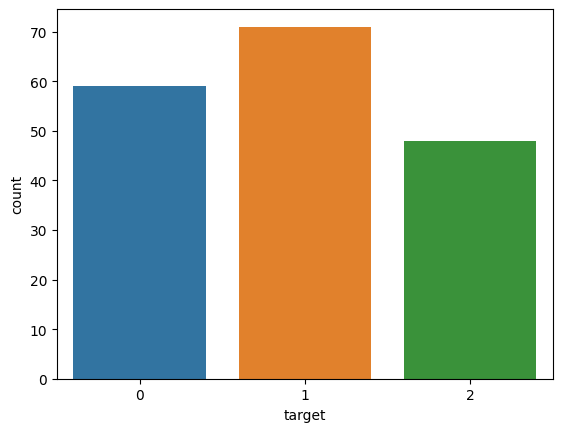

In [2]:
# Load the Wine dataset
wine = load_wine(as_frame=True)

print("X.shape: ",wine.data.shape, "y.shape: ", wine.target.shape)
print("feature names:", wine.feature_names)
print("target names:", wine.target_names)


# Feature information
wine.data.info()
# Visualize the distribution of the target variable using a bar plot:
sns.countplot(x=wine.target)
plt.show()

In [3]:
# There are some future warnings that we want to ignore for this exercise
import warnings
warnings.filterwarnings("ignore")

# Assign the features to X and the target variable to y
X = wine.data.values
y = wine.target.values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with default hyperparameters
dtc = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='gini')

# Create a bagging classifier with decision tree base estimator
bc = BaggingClassifier(base_estimator=dtc, n_estimators=100, random_state=42)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3, criterion='gini')

# Fit the models on the training data
dtc.fit(X_train, y_train)
bc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Make predictions on the test data
dtc_pred = dtc.predict(X_test)
bc_pred = bc.predict(X_test)
rfc_pred = rfc.predict(X_test)

# Evaluate the accuracy of the models
dtc_acc = accuracy_score(y_test, dtc_pred)
bc_acc = accuracy_score(y_test, bc_pred)
rfc_acc = accuracy_score(y_test, rfc_pred)

print("Decision Tree Classifier Accuracy:", dtc_acc)
print("Bagging Classifier Accuracy:", bc_acc)
print("Random Forest Classifier Accuracy:", rfc_acc)



Decision Tree Classifier Accuracy: 0.9444444444444444
Bagging Classifier Accuracy: 0.9722222222222222
Random Forest Classifier Accuracy: 1.0


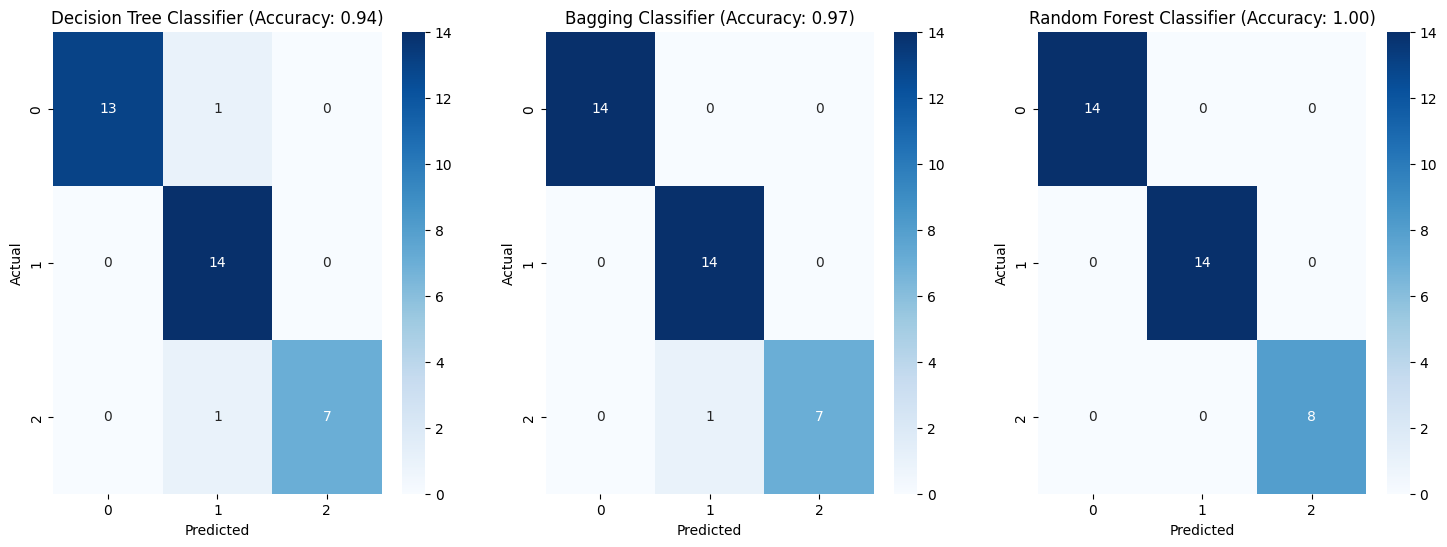

In [4]:
# Generate a confusion matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
bc_cm = confusion_matrix(y_test, bc_pred)
rfc_cm = confusion_matrix(y_test, rfc_pred)

# Plot the confusion matrix as a heatmap
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

# Plot the confusion matrix for the decision tree classifier
sns.heatmap(dtc_cm, annot=True, cmap="Blues", ax=ax1)
# Set the x and y axis labels for the plot
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")
ax1.set_title("Decision Tree Classifier")
ax1.set_title(f"Decision Tree Classifier (Accuracy: {dtc_acc:.2f})") 

# Plot the confusion matrix for the bagging classifier
sns.heatmap(bc_cm, annot=True, cmap="Blues", ax=ax2)
# Set the x and y axis labels for the plot
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")
ax2.set_title(f"Bagging Classifier (Accuracy: {bc_acc:.2f})")

# Plot the confusion matrix for the random forest classifier
sns.heatmap(rfc_cm, annot=True, cmap="Blues", ax=ax3)
# Set the x and y axis labels for the plot
ax3.set_xlabel("Predicted")
ax3.set_ylabel("Actual")
ax3.set_title(f"Random Forest Classifier (Accuracy: {rfc_acc:.2f})")

plt.show()

In this tast, the results show the performance of three different classifiers on the dataset. The Decision Tree Classifier has an accuracy of 0.944, which means that it correctly classified 94.4% of the samples in the test set. The Bagging Classifier has an accuracy of 0.972, which is better than the Decision Tree Classifier, suggesting that the bagging ensemble has improved the accuracy of the individual decision trees. The Random Forest Classifier has the best performance with an accuracy of 1.0, which means that it has correctly classified all the samples in the test set. This indicates that the random forest ensemble has further improved the accuracy of the bagging ensemble by introducing randomization in the feature selection process. 

## Pros and Cons

**Pros:**
- Robust to overfitting due to the averaging of multiple trees.
- Can handle a large number of features and high-dimensional data.
- Works well with both categorical and continuous variables.
- Can be easily parallelized, leading to faster training and prediction times.
- Provides estimates of feature importance.

**Cons:**
- Less interpretable than single decision trees.
- Slower to train and predict compared to simpler models, such as linear or logistic regression.
- May not perform well with very sparse or unstructured data, such as text data in natural language processing tasks.

## Suitable Tasks and Datasets

Random Forest is a versatile algorithm and can be used for a wide range of tasks and datasets. Here are some of the suitable tasks and datasets for Random Forest:

**Tasks:**
1. **Classification:** Random Forest can handle binary and multiclass classification tasks well.
2. **Regression:** Random Forest can also be used for regression tasks to predict continuous outcomes.
3. **Feature Importance:** Random Forest provides a straightforward method for feature importance estimation, which can be useful for feature selection.

**Datasets:**
1. **High-Dimensional Data:** Random Forest performs well with high-dimensional datasets where the number of features is much larger than the number of observations.
2. **Mixed Data:** Random Forest can handle datasets that have a mix of categorical and numerical features.
3. **Unbalanced Data:** Random Forest can handle unbalanced datasets by balancing error function.
4. **Missing Values:** Random Forest can handle missing values in the dataset.
5. **Large Datasets:** Random Forest can handle large datasets as it uses a subset of data for building each tree, making it scalable.


## References

1. Opitz, D., & Maclin, R. (1999). Popular ensemble methods: An empirical study. Journal of artificial intelligence research, 11, 169-198.
2. Dietterich, T. G. (2000). Ensemble methods in machine learning. In Multiple Classifier Systems: First International Workshop, MCS 2000 Cagliari, Italy, June 21–23, 2000 Proceedings 1 (pp. 1-15). Springer Berlin Heidelberg.
3. Kuncheva, L. I. (2014). Combining pattern classifiers: methods and algorithms. John Wiley & Sons.
4. Polikar, R. (2006). Ensemble based systems in decision making. IEEE Circuits and systems magazine, 6(3), 21-45.
5. Breiman, L. (1996). Bagging predictors. Machine learning, 24, 123-140.
6. Breiman, L. (2001). Random forests. Machine learning, 45, 5-32.
7. Liaw, A., & Wiener, M. (2002). Classification and regression by randomForest. R news, 2(3), 18-22.
8. Cutler, D. R., Edwards Jr, T. C., Beard, K. H., Cutler, A., Hess, K. T., Gibson, J., & Law
9. Scikit-Learn Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
10. Scikit-Learn Random Forest Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
11. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".